<a href="https://colab.research.google.com/github/justinBiester6/ds1001_final/blob/main/ds1001_final/notebooks/Final_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Notebook

Use the follow cells prompts to complete the final project for the course. Everything you need should be present in this notebook or previous notebooks we've used in class. You can work together as needed.

 - You will need to name your own dataset and use that name throughout
 - There are sections where you need to make changes the code and insert new code this will be noted in the code provided
 - You may get frustrated along the way, this is totally normal, just remember even small changes to the code make a huge difference.

## Question Fork the Repository
i. Include a screenshot of the forked repo in your GitHub account

To fork the repository:
1. Go to https://github.com/NovaVolunteer/ds1001_final
2. Click the "Fork" button in the top right corner
3. The repo will be forked to your GitHub account
4. Take a screenshot of your forked repository

### You should now be able to open your cloned repo in google collab, use the code below.

### It's very helpful to have the variable inspector open while you go through this process. To do so go to tools>command palette>show variable inspector

### It's also helpful to open up the folder tree on the left menu bar. Just click on the folder icon and then the ds1001_final folder. The data is located in the data folder in the processed sub-folder.

In [67]:
!git clone "https://github.com/justinBiester6/ds1001_final.git"
# This script clones a GitHub repository using Git command line tool.
# Insert the path to your desired repository in place of the URL.

fatal: destination path 'ds1001_final' already exists and is not an empty directory.


## Systems

In [68]:
# Activate the finalproj environment
!source ds1001_final/ds1001_final/finalproj/bin/activate

In [69]:
### You can use this command to list all the packages in your environment
!pip list

Package                                  Version
---------------------------------------- -------------------
absl-py                                  1.4.0
accelerate                               1.12.0
access                                   1.1.9
affine                                   2.4.0
aiofiles                                 24.1.0
aiohappyeyeballs                         2.6.1
aiohttp                                  3.13.2
aiosignal                                1.4.0
aiosqlite                                0.21.0
alabaster                                1.0.0
albucore                                 0.0.24
albumentations                           2.0.8
ale-py                                   0.11.2
alembic                                  1.17.2
altair                                   5.5.0
annotated-types                          0.7.0
antlr4-python3-runtime                   4.9.3
anyio                                    4.12.0
anywidget                           

In [70]:
!pip install fairlearn

#You'll likely need to install the fairlearn packages, if not already installed.
#Are there additional packages to install? (Cross check with the list above to
# ensure all packages are installed)

### Check !pip list again to confirm installations

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import fairlearn.metrics
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import count, true_positive_rate, false_positive_rate, selection_rate, demographic_parity_ratio


## Design: Data prep and exploration

In [72]:
bd = pd.read_csv('/content/ds1001_final/ds1001_final/data/processed/bank_final.csv') # the data is the data folder,
#you'll need to use the correct path to the dataset.

# How many rows are in the dataframe? How many columns?
num_rows, num_columns = bd.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
bd.dtypes

Number of rows: 43628
Number of columns: 13


,0
age,int64
job,object
marital,object
education,object
race,object
default,object
balance,int64
housing,object
contact,object
duration,int64


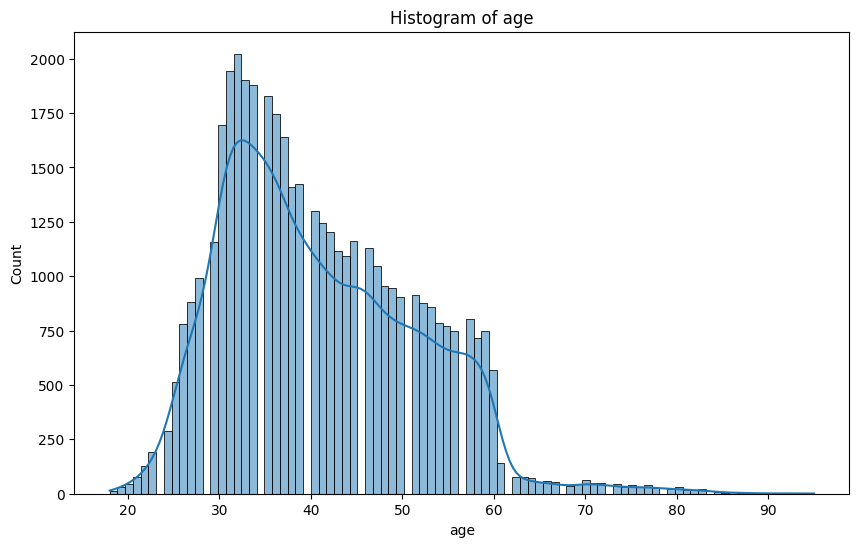

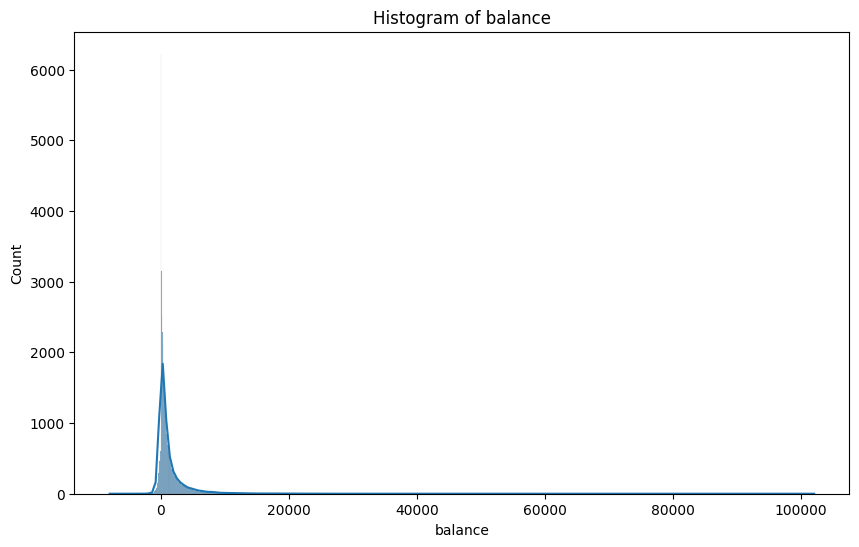

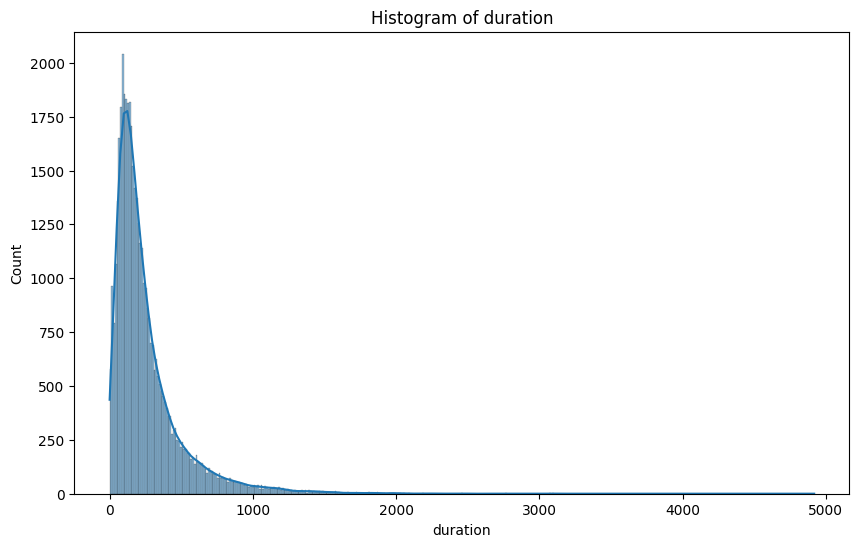

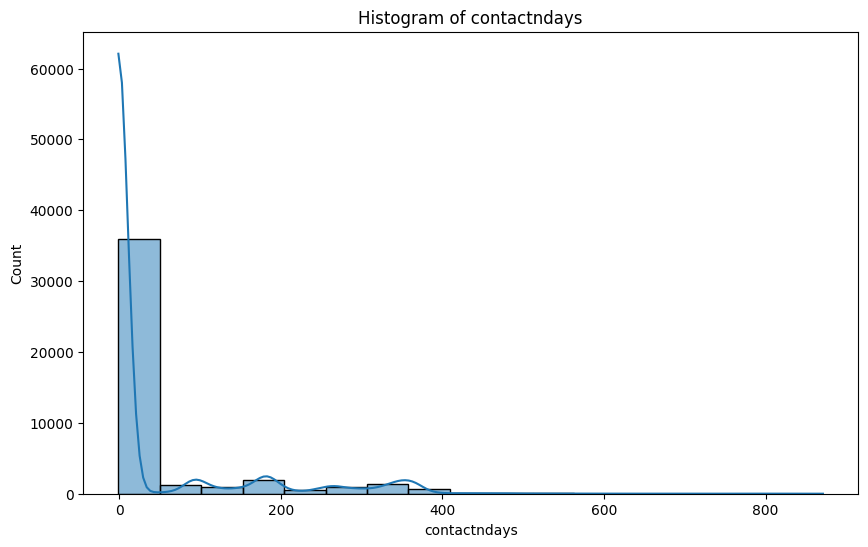

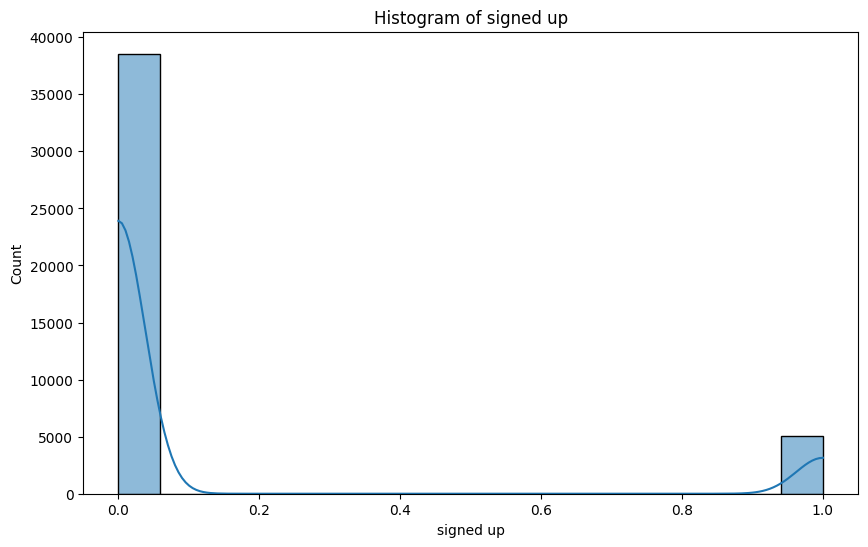

In [73]:
# Explore the variables a bit more, create histograms for the numerics values and bar charts for the categorical.
# Histograms for numeric variables
numeric_columns = bd.select_dtypes(include=['number']).columns
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(bd[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()



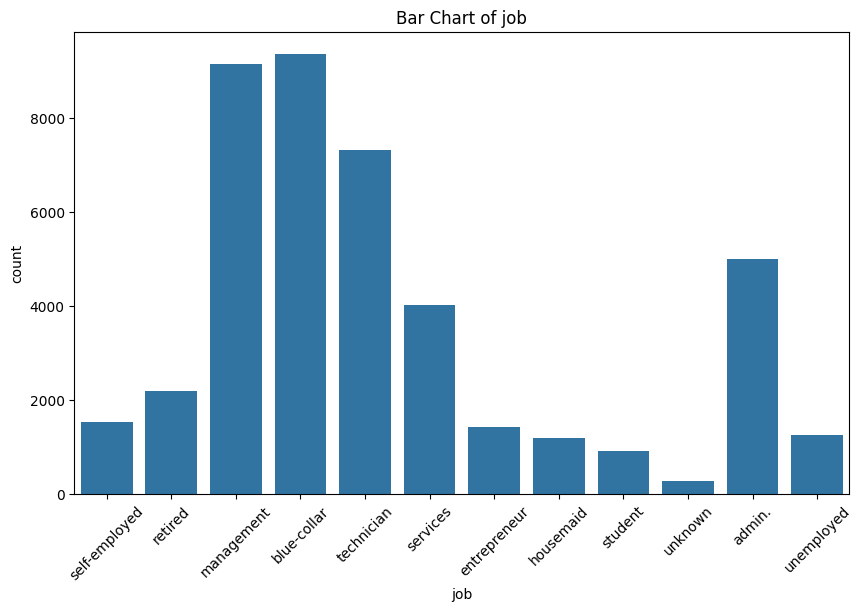

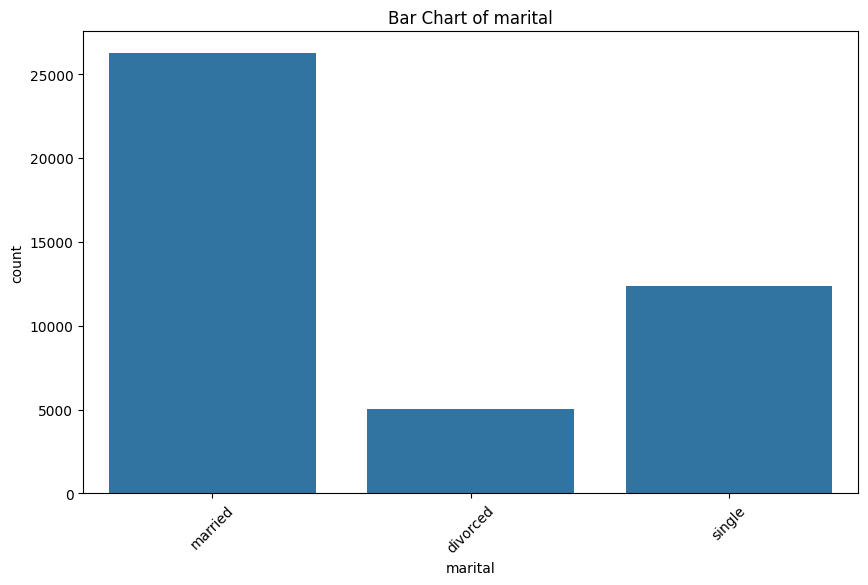

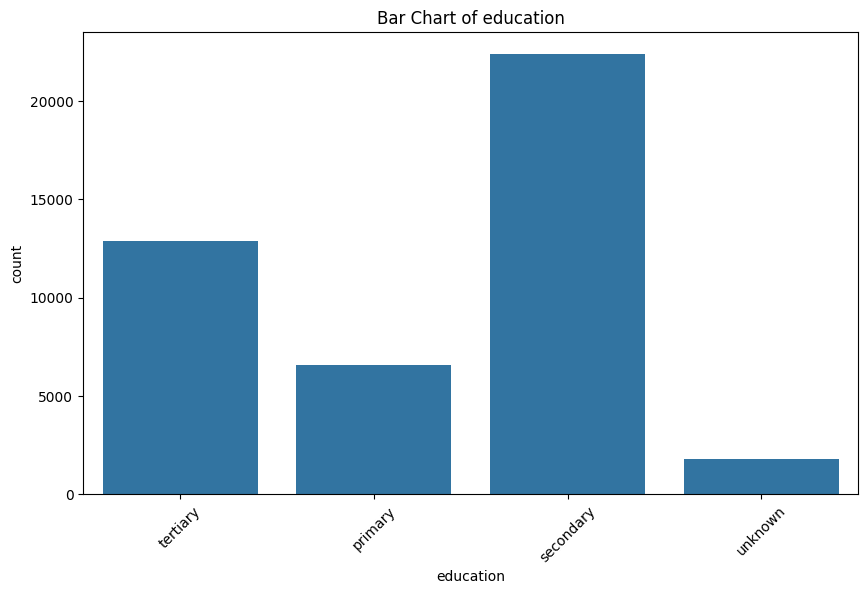

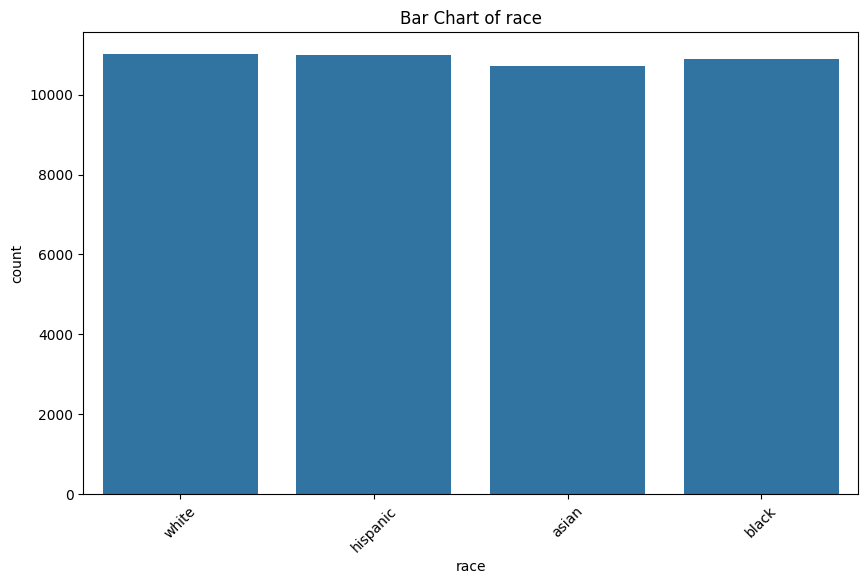

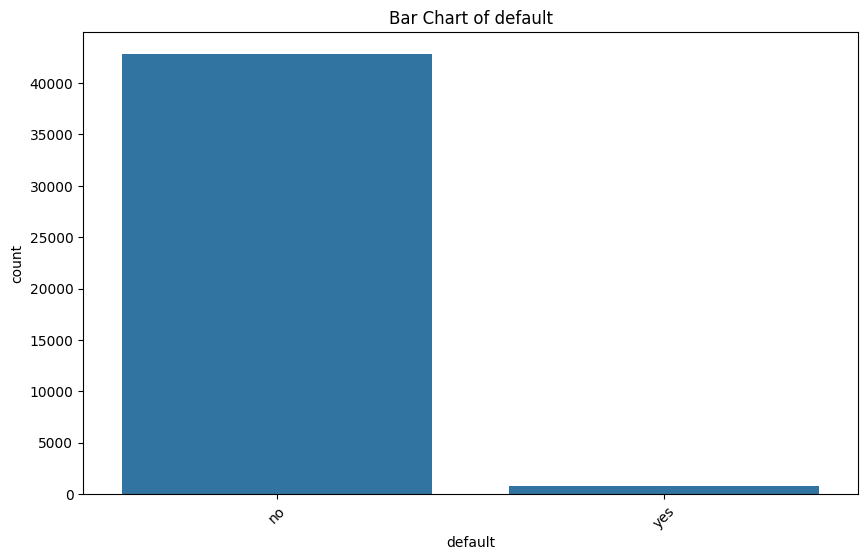

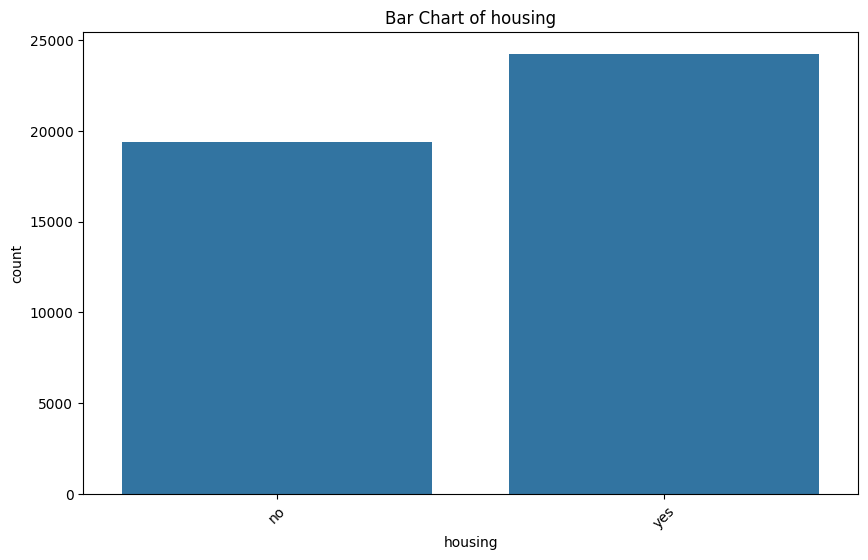

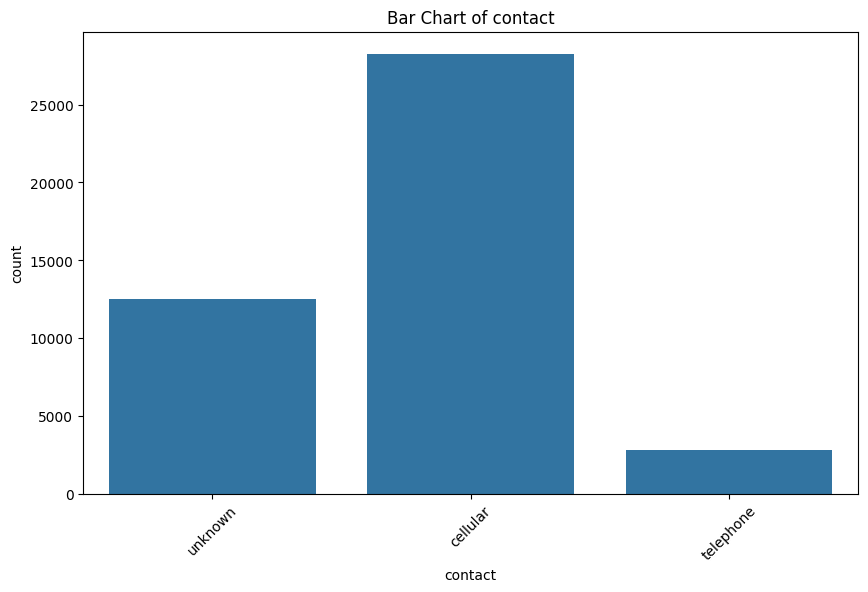

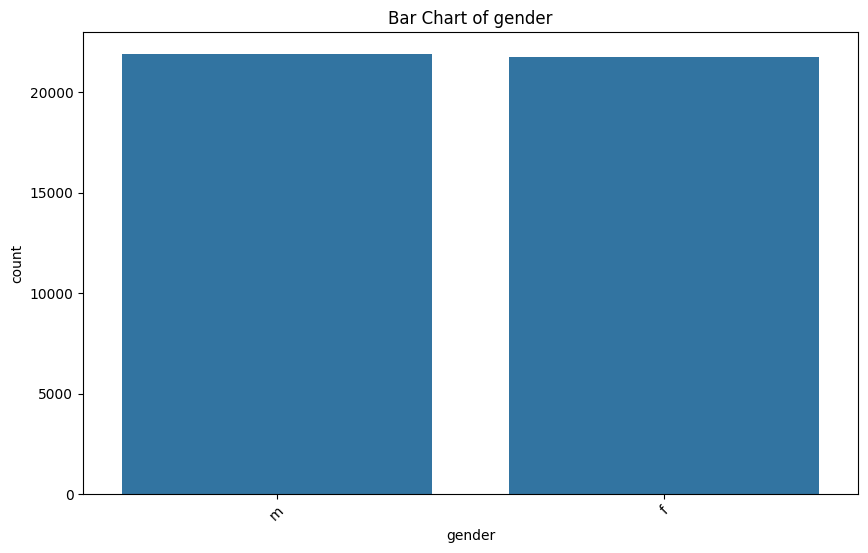

In [74]:
# Bar charts for categorical variables
categorical_columns = bd.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=bd[col])
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [75]:
# How many numeric columns are in the data set?
num_numeric_columns = bd.select_dtypes(include=['number']).shape[1]
print(f"Number of columns: {num_numeric_columns}")
bd.dtypes

Number of columns: 5


,0
age,int64
job,object
marital,object
education,object
race,object
default,object
balance,int64
housing,object
contact,object
duration,int64


In [76]:
# Normalization
scaler = MinMaxScaler()
numeric_cols = bd.select_dtypes(include=['number']).columns

bd[numeric_cols] = scaler.fit_transform(bd[numeric_cols])


In [77]:
# Likely need to convert categorical columns to category dtype
for col in bd.select_dtypes(include=['object']).columns:
    bd[col] = bd[col].astype('category')
bd.dtypes

,0
age,float64
job,category
marital,category
education,category
race,category
default,category
balance,float64
housing,category
contact,category
duration,float64


In [78]:
# Creating dummy variables, make sure the variables that need to be converted to dummies are categorical, not numeric.
# This might require you to convert some columns to categorical first using astype('category')
bd = pd.get_dummies(bd, drop_first=True)

num_rows, num_columns = bd.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
bd.info()

Number of rows: 43628
Number of columns: 29
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43628 entries, 0 to 43627
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  43628 non-null  float64
 1   balance              43628 non-null  float64
 2   duration             43628 non-null  float64
 3   contactndays         43628 non-null  float64
 4   signed up            43628 non-null  float64
 5   job_blue-collar      43628 non-null  bool   
 6   job_entrepreneur     43628 non-null  bool   
 7   job_housemaid        43628 non-null  bool   
 8   job_management       43628 non-null  bool   
 9   job_retired          43628 non-null  bool   
 10  job_self-employed    43628 non-null  bool   
 11  job_services         43628 non-null  bool   
 12  job_student          43628 non-null  bool   
 13  job_technician       43628 non-null  bool   
 14  job_unemployed       43628 non-null  bool 

In [79]:
# Display missing data using the isnull function, is there any missing data?
print(bd.isnull().sum())

age                    0
balance                0
duration               0
contactndays           0
signed up              0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
race_black             0
race_hispanic          0
race_white             0
default_yes            0
housing_yes            0
contact_telephone      0
contact_unknown        0
gender_m               0
dtype: int64


In [80]:
# remove missing values if needed
bd = bd.dropna()

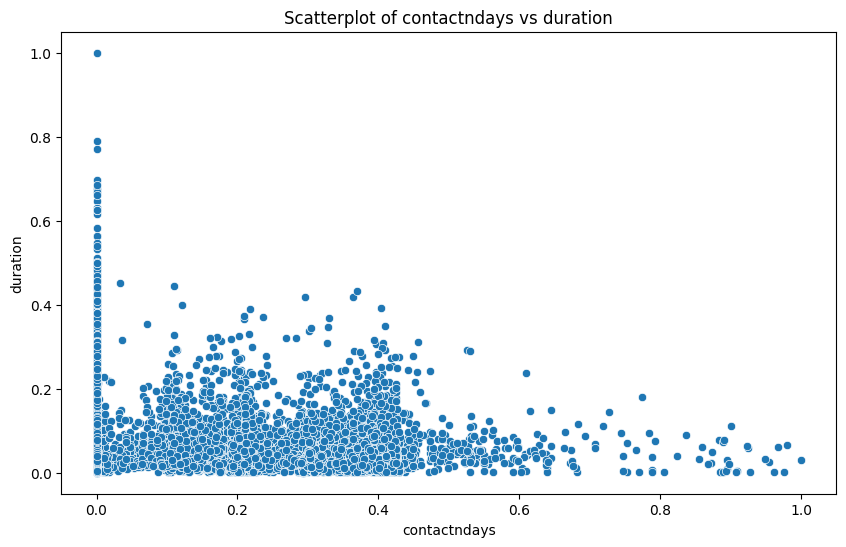

In [81]:
# Scatterplot between two continuous variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='contactndays', y='duration', data=bd)  # Replace 'Variable1' and 'Variable2' with your column names
plt.title('Scatterplot of contactndays vs duration')
plt.savefig('scatterplot.png')  # Save the scatterplot image
plt.show()

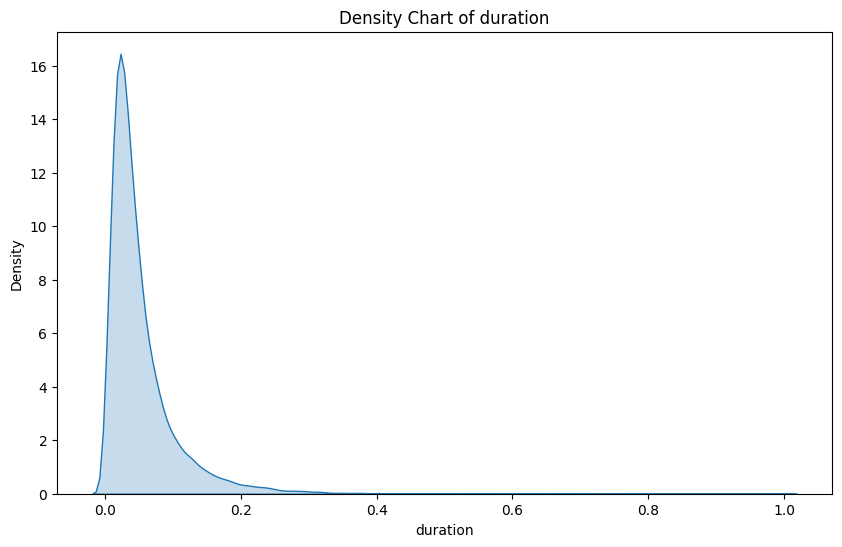

In [82]:
# Density chart of a continuous variable
plt.figure(figsize=(10, 6))
sns.kdeplot(bd['duration'], fill=True)  # Replace 'ContinuousVariable' with your column name
plt.title('Density Chart of duration')
plt.show()

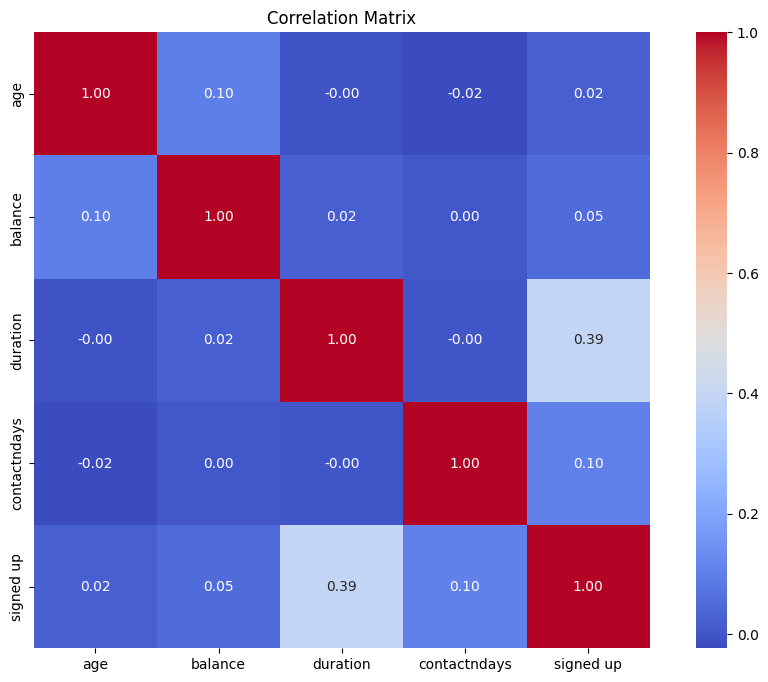

In [83]:
#Correlation matrix, make sure to only include numeric variables
num_values = bd.select_dtypes(include=['number'])
correlation_matrix = num_values.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## Analytics: Build a model and Tune it for best Best Performance

In [84]:
# What is the ‘target’ of a model and what is the prevalence of the target in your dataset? Remember prevalence
# is the proportion of records that take on the value of interest for the target variable, usually the positive class.
target_prevalence = bd['signed up'].sum()  # Replace 'TargetVariable' with your target column name
print(f'Target Prevalence: {target_prevalence}')

Target Prevalence: 5074.0


In [85]:
# Divide the dataset into features and target
target = bd['signed up']  # Replace 'TargetVariable' with your actual target column name and "xx" with your dataframe name
features = bd.drop(columns=['signed up']) # Drop the target column from features


In [86]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Include your table for the 10 values of k you tried and the corresponding accuracies.

accuracy_results = {}

# Replace x with your desired range values, explain what is happening in this loop
for k in range(3, 23, 2):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    accuracy = knn_model.score(X_test, y_test)
    accuracy_results[k] = accuracy
    print(f'Accuracy for  {k}')
    print(f'Accuracy:  {accuracy_results[k]}')

Accuracy for  3
Accuracy:  0.8766903506761403


In [ ]:
#graph of accuracy vs k values
plt.figure(figsize=(10, 6))
plt.plot(list(accuracy_results.keys()), list(accuracy_results.values()), marker='o')
plt.title('KNN Accuracy vs K Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(list(accuracy_results.keys()))
plt.grid()
plt.show()

In [ ]:
# using the hyperparameter k that gave the best accuracy, rerun the model and generate
# predictions on the test set. Explain why you choose this k value.
best_k = 9  # Replace 'xx' with the best k value found
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

## Value: Evaluation and Protected Classes

In [ ]:
# create a confusion matrix for your model's predictions.
# What does the confusion matrix tell you about your model's performance?
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#We already have a model above using KNN so we can use the results to compute fairness metrics

# Compute fairness metrics using Fairlearn

my_metrics = {
    'true positive rate' : true_positive_rate,
    'false positive rate' : false_positive_rate,
    'selection rate' : selection_rate,
    'count' : count
}
# Construct a MetricFrame for race
mf_race = MetricFrame(
    metrics=my_metrics,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=X_test['race_black']  # Replace with your first protected class
)

# Construct a MetricFrame for gender
mf_gender = MetricFrame(
    metrics=my_metrics,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=X_test['gender_m']  # Replace second protected class
)


In [ ]:
mf_race.by_group #What do the results show? Change the mf_race with each subgroup and report the findings. This means
# you should run this cell multiple times, once for each of the levels in the race variable.

In [ ]:
mf_gender.by_group #What do the results show? There's only two groups here so we don't need to change anything.
# in the metric frame.

In [ ]:
# Derived fairness metrics. Be sure you understand the scale and meaning of these. Here we are calculating the
# two fairness ratios using the gender_m feature, which is bi-variate. What do the results show, is the model more or
# less fair with this grouping?

dpr_gender = fairlearn.metrics.demographic_parity_ratio(y_test, y_pred, sensitive_features=X_test['gender_m'])
print("Demographic Parity ratio:\t", dpr_gender)

eodds_gender = fairlearn.metrics.equalized_odds_ratio(y_test, y_pred, sensitive_features=X_test['gender_m'])
print("Equalized Odds ratio:\t\t", eodds_gender)

In [ ]:
# Derived fairness metrics. Be sure you understand the scale and meaning of these. Here we are calculating the
# the same features above only using a filtered search to pull in all the possibilities of features
# starting with "race". What do the results show, is the model more or less fair with this grouping?

dpr_race = fairlearn.metrics.demographic_parity_ratio(y_test, y_pred, sensitive_features=X_test.filter(regex="race.*"))
print("Demographic Parity ratio:\t", dpr_race)

eodds_race = fairlearn.metrics.equalized_odds_ratio(y_test, y_pred, sensitive_features=X_test.filter(regex="race.*"))
print("Equalized Odds ratio:\t\t", eodds_race)

In [ ]:
#Optional code to add, commit, and push changes to your GitHub repository
!git add .
!git commit -m "finished the final" # This will commit your changes to git.
!git push # This will push your changes to back to your remote repository on GitHub.